In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory("/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [6]:
x_test=test_datagen.flow_from_directory("/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [7]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [9]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
32*(3*3*3+1)

896

In [12]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [13]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
len(x_train)

225

In [15]:
1238/24

51.583333333333336

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
225/225 [==============================] - 176s 780ms/step - loss: 0.7183 - accuracy: 0.8223 - val_loss: 0.2102 - val_accuracy: 0.9247
Epoch 2/10
225/225 [==============================] - 171s 758ms/step - loss: 0.2246 - accuracy: 0.9216 - val_loss: 0.2100 - val_accuracy: 0.9300
Epoch 3/10
225/225 [==============================] - 170s 755ms/step - loss: 0.1709 - accuracy: 0.9439 - val_loss: 0.1022 - val_accuracy: 0.9656
Epoch 4/10
225/225 [==============================] - 173s 769ms/step - loss: 0.1405 - accuracy: 0.9526 - val_loss: 0.1294 - val_accuracy: 0.9520
Epoch 5/10
225/225 [==============================] - 173s 767ms/step - loss: 0.1474 - accuracy: 0.9493 - val_loss: 0.1477 - val_accuracy: 0.9466
Epoch 6/10
225/225 [==============================] - 171s 758ms/step - loss: 0.1080 - accuracy: 0.9603 - val_loss: 0.1374 - val_accuracy: 0.9597
Epoch 7/10
225/225 [==============================] - 171s 761ms/step - loss: 0.1033 - accuracy: 0.9634 - val_loss: 0.0721 -

In [27]:
model.save('fruit.h5')

In [28]:
!tar -zcvf Train-model_new.tgz fruit.h5

fruit.h5


## **IBM Depolyment**

In [29]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 7.2 MB/s 
     |████████████████████████████████| 132 kB 58.2 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 9.9 MB 57.5 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 140 kB 70.5 MB/s 
     |████████████████████████████████| 956 kB 55.8 MB/s 
     |████████████████████████████████| 135 kB 52.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=b0792c5bb7f9bc9c756569cbb0e85b869274d87acd8745d00f84e0d1af6aeadd
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=a803ecac4e8

In [30]:
!pip install ibm_watson-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.3 MB/s 
     |████████████████████████████████| 51 kB 722 kB/s 
     |████████████████████████████████| 824 kB 58.4 MB/s 
     |████████████████████████████████| 133 kB 62.1 MB/s 
     |████████████████████████████████| 547 kB 57.7 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=63dc7e2206bf5898a90fd81794494a8d41cab952318b20c0aecdfb20863d67a5
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=42fc83b7637261089b4a77b605852b2cbd3df0f1bd84a5899f13c55a8e404c22
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [31]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url": "https://eu-gb.ml.cloud.ibm.com",
                   "apikey":"3bRahrx8yCtPdua2dJO--VDoFLG48v4eUyv8vFkVxvke" 
                  }
client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [32]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/7406633613584ea784d56717e74cee2e:3aedc0db-7066-4441-9193-348346110130::',
      'guid': '3aedc0db-7066-4441-9193-348346110130',
      'name': 'Watson Machine Learning-me',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Model_for_disease_depoly',
    'scope': {'bss_account_id': '7406633613584ea784d56717e74cee2e'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '35714ccc-d2d9-4c0a-b207-9d1c3ded7a0a',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'f663f962c9ac4558a582adc2e132af6d',
        'api_key': '_loloaGIVXfS03GlOOBqbgIiVqfEkLkR9YAnobFnj-p-',
        'secret_access_key': 'd34719f183a98d405d3573dd2005463fb40138155bf8df43',
        'service_id': 'ServiceId-f08988d2-f4d5-4a8e-bcf8-7fe7991d07af'},
       'editor': {'access_key_id': 'c028ac2637f34e179a9517cd6483be23',
 

In [33]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [35]:
space_uid = guid_from_space_name(client, 'Model_for_disease_depoly') 
print("Space UID = " + space_uid)

Space UID = 403fa567-6370-44e4-9aaa-c35c2f43a1c3


In [36]:
client.set.default_space(space_uid)

'SUCCESS'

In [37]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [39]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [41]:
model_details = client.repository.store_model(model= 'Train-model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
)

In [42]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-15T16:25:41.184Z',
  'id': '16039a67-3585-46f9-93e0-026c94df550f',
  'modified_at': '2022-11-15T16:25:59.132Z',
  'name': 'CNN',
  'owner': 'IBMid-668000C45L',
  'resource_key': '9f6c8752-c84d-4d09-b270-60a5837ccfa6',
  'space_id': '403fa567-6370-44e4-9aaa-c35c2f43a1c3'},
 'system': {'warnings': []}}

In [43]:
model_id = client.repository.get_model_id(model_details)
model_id

'16039a67-3585-46f9-93e0-026c94df550f'

# **Test the model**

In [44]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('fruit.h5')

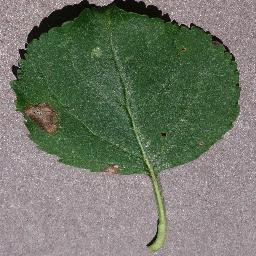

In [48]:
img=image.load_img('/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG')
img

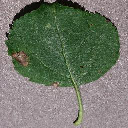

In [49]:
img=image.load_img('/content/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG',target_size=(128,128))
img

In [50]:
x=image.img_to_array(img)
x

array([[[122., 107., 110.],
        [173., 158., 161.],
        [184., 169., 172.],
        ...,
        [218., 203., 206.],
        [143., 128., 131.],
        [154., 139., 142.]],

       [[144., 129., 132.],
        [159., 144., 147.],
        [145., 130., 133.],
        ...,
        [141., 126., 129.],
        [136., 121., 124.],
        [134., 119., 122.]],

       [[142., 127., 130.],
        [157., 142., 145.],
        [165., 150., 153.],
        ...,
        [156., 141., 144.],
        [112.,  97., 100.],
        [129., 114., 117.]],

       ...,

       [[161., 148., 155.],
        [150., 137., 144.],
        [156., 143., 150.],
        ...,
        [145., 133., 137.],
        [148., 136., 140.],
        [155., 143., 147.]],

       [[178., 165., 172.],
        [158., 145., 152.],
        [169., 156., 163.],
        ...,
        [149., 137., 141.],
        [169., 157., 161.],
        [152., 140., 144.]],

       [[170., 157., 164.],
        [157., 144., 151.],
        [163., 1

In [51]:
x=np.expand_dims(x,axis=0)

In [54]:
y=np.argmax(model.predict(x),axis=0)

1/1 [==============================] - 0s 44ms/step


In [55]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___Black_rot'

In [56]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask,render_template,request

In [ ]:
app=Flask(__name__)

model=load_model("fruit.h5")

@app.route('/')
def index():
    return render_template("index.html")

@app.route('/predict',methods=['GET','POST'])
def upload():
    if request.method=='POST':
        f=request.files['image']
        basepath=os.path.dirname('__file__')
        filepath=os.path.join(basepath,'uploads',f.filename)
        f.save(filepath)
        img=image.load_img(filepath,target_size=(128,128))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        pred=np.argmax(model.predict(x),axis=1)
        index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
        text="The Classified Fruit disease is : " +str(index[pred[0]])
    return text
if __name__=='__main__':
    app.run(debug=False)